## 1.- Importing ROI module

In [5]:
import sys
sys.path.append('../')

import acalib
from acalib.algorithms import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

NameError: name 'support_nddata' is not defined

## 2.- Reading Data to AContainer

INFO:astropy:Processing HDU 0 (Image)


INFO: Processing HDU 0 (Image) [acalib.io.formats]
INFO

INFO:astropy:4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES


: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.formats]


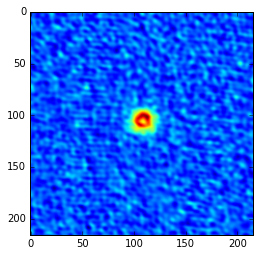

(71, 216, 216)

In [4]:
#Path to fits folder
binpath = '../bindata/'
c = acalib.AContainer()

#Loading fits to container
io.load_to_cont(binpath+'ALMA01000740.fits',c)
cube = c.primary

#Creating Spectra Sketcher and Gaussian Segmentation
ss = ri.SpectraSketcher(cube.data)
gs = ri.GaussianSegmentation(prob=0.05, precision=2./100)

#Stacking cube to show emissions
plt.imshow(cube.stack())
plt.show()
cube.shape()

## 3.- Cube Spectra Sketch

Using random samples of pixels, create an sketch of the data cube. 

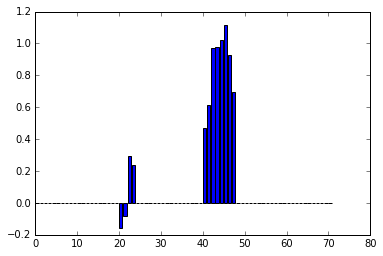

[slice(20, 24, None), slice(40, 48, None)]

In [5]:
#Getting frecuencies
xs = cube.shape()[1]
ys = cube.shape()[2]
frecs_len = cube.shape()[0]
frecs = range(frecs_len)

#Creating spectra sketch
spectra,slices = ss.cube_spectra((xs*ys)/100)

#Plotting spectra
plt.bar(frecs,spectra)
plt.show()
slices

## 4.- Create Slices 

(216, 216)


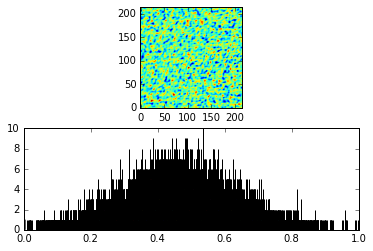

(216, 216)


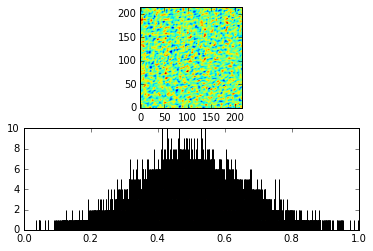

(216, 216)


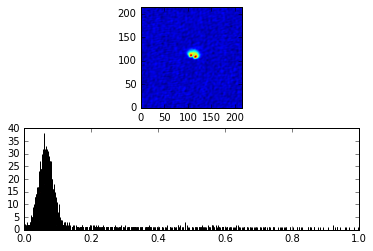

(216, 216)


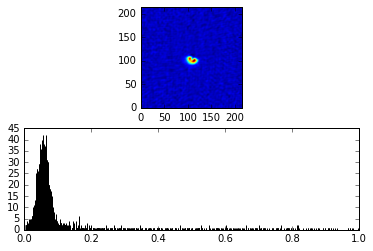

In [8]:
ppslices = []
for i,slic in enumerate(slices):
    fig = plt.figure()
    image = ss.vel_stacking(cube,slic.start,slic.stop)
    
    ax = fig.add_subplot(1,2, 1)
    ax.imshow(image, origin='image')
    print image.shape
    ax = fig.add_subplot(1,256, 2)
    ax.hist(image, bins=256)
    plt.show() 
    ppslices.append(image)


## 5.- Run Segmentation on each slice 

Return Scikit-image RegionProp objects http://scikit-image.org/docs/dev/api/skimage.measure.html#regionprops

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


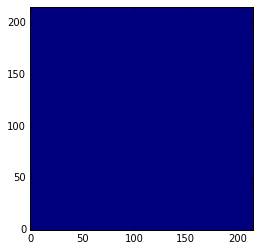

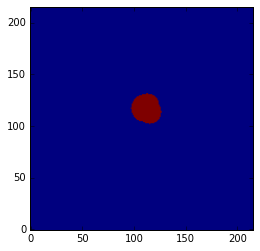

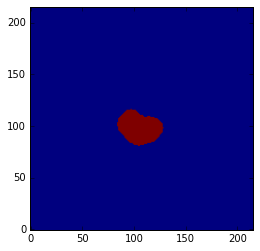

In [5]:
fts_all = []
for image in ppslices:
    fts = gs.gaussian_mix(image)
    fts_all.append(fts)